# Домашнее задание №4

## Задание 1

1. Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.

2. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. 

In [72]:
# импортируем os, re
import os
import re

# читаем файл с Гарри Поттером
with open("Harry_Potter_and_the_Sorcerers_Stone.txt", "r", encoding="utf-8") as f:
    Harry = f.read()

# очищаем Гарри Поттера от пунктуации: все, что не буквы, заменяем на ничего; перенос строки на пробел
Harry_without_punctuation = re.sub("[^A-Za-z ]","",Harry.replace("\n"," "))

# приводим текст к нижнему регистру
harry_lower = Harry_without_punctuation.lower()

In [73]:
# импортируем nltk, spacy
import nltk
import spacy
# указываем полный путь к английскому словарю в spacy
nlp = spacy.load('C:\\Users\\User\\Anaconda3\\lib\\site-packages\\en_core_web_sm\\en_core_web_sm-2.0.0')

In [75]:
#лемматизируем текст
harry_lower_words = harry_lower.split()
# заполняем массив Harry_lemm леммами, полученными с помощью spacy
Harry_lemm = []
for w in harry_lower_words:
    lemma = nlp(w)[0].lemma_
    if lemma!="-PRON-": # NB! - spacy заменяет все личные местоимения обозначением -PRON-, для того, чтобы это не портило статистику, убираем его
        Harry_lemm.append(lemma)
    else:
        Harry_lemm.append(w)


#соединяем через пробел текст в строку
Harry_lemmas = ' '.join(Harry_lemm) 

#создаем функцию, которая записывает лемматизированный текст в Harry_lemmas
with open('Harry_lemmas.txt', 'w', encoding='utf-8') as f: 
    f.write(Harry_lemmas)

Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

In [82]:
#высчитываем x - ранг (порядковый номер) слова в отсортированном частотном словаре
from collections import Counter 

#с помощью counts считаем частотность слов в тексте
counts = Counter(Harry_lemm)
counts_dict = dict(counts) #делаем из массива словарь

# сортируем словарь
sorted_counts = sorted(counts_dict.items(), key=lambda x: x[1], reverse=True)
sorted_counts_dict = dict(sorted_counts) # sorted_counts_dict - словарь

In [83]:
#считаем относительную частоту (y)

length = len(Harry_lemm) #считаем количество слов в тексте
y = []

#создаем цикл
for word, count in sorted_counts_dict.items(): # достаем из словаря все пары ключей со значениями
    frequency = count/length # делим значения словаря на количество слов для расчета ipm
    y.append(frequency) # добавляем получившуюся частоту в y


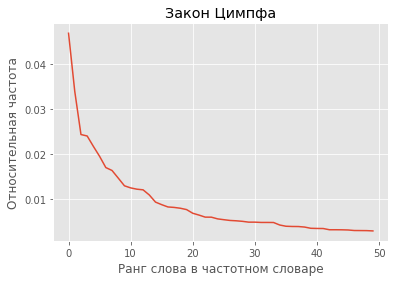

In [84]:
# импортируем matplotlib.pyplot как plt
import matplotlib.pyplot as plt
from matplotlib import style  # добавляем стили

style.use('ggplot')  # выбираем стиль ggplot

plt.plot(y[:50]) # обрезаем до 50 ради большей наглядности
plt.title("Закон Цимпфа")
plt.xlabel("Ранг слова в частотном словаре")
plt.ylabel("Относительная частота")
plt.show()

3. Очистите текст от стоп-слов

In [85]:
# из nltk импортируем стоп слова
from nltk.corpus import stopwords
# импортируем английский словарь
sw = stopwords.words('english')
# слздаем переменную для файла без стоп-слов
Harry_without_stops = [w for w in Harry_lemm if w not in sw]

Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [86]:
#с помощью counts считаем частотность слов в тексте
counts = Counter(Harry_without_stops)
counts_dict = dict(counts) #делаем из массива словарь

# сортируем словарь
sorted_counts = sorted(counts_dict.items(), key=lambda x: x[1], reverse=True)
sorted_counts_dict = dict(sorted_counts) # sorted_counts_dict - словарь

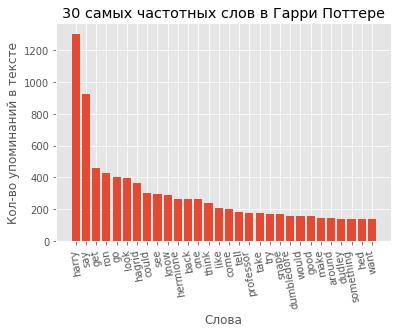

In [87]:
# переменная со значениями
counts = list(sorted_counts_dict.values())
# переменная с ключами
words = list(sorted_counts_dict.keys())

# выводим 30 самых частотных слов в первой части Гарри Поттера
plt.bar(range(0,30),counts[:30])
plt.xticks(range(0,30),words[:30], rotation=100)
plt.title("30 самых частотных слов в Гарри Поттере")
plt.xlabel("Слова")
plt.ylabel("Кол-во упоминаний в тексте")
plt.show()